In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('phishing.txt', names = ['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
           'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
           'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
           'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
           'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
           'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain',
           'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
           'LinksPointingToPage', 'StatsReport', 'class'])

In [2]:
data.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


#### Exercise 1
    
1. Build a phishing website classifier using Logistic Regression with “C” parameter = 100. 
2. Use 70% of data as training data and the remaining 30% as test data.      
    

In [3]:
input_x = data.drop('class', axis = 1)
output_y = data['class']

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size = 0.3, random_state=42)

model = LogisticRegression(C = 100)
model.fit(x_train, y_train)

pred= model.predict(x_test)

3. Print count of misclassified samples in the test data prediction as well as the accuracy score of the model. 

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, pred)
print('Confusion Matrix: ',conf_matrix)
print('Count of Misclassified Samples: ', conf_matrix[0][1] + conf_matrix[1][0])
print('Accuracy Score:', accuracy_score(y_test, pred))

Confusion Matrix:  [[1298  130]
 [ 129 1760]]
Count of Misclassified Samples:  259
Accuracy Score: 0.9219173952366596


#### Exercise 2

1. Train with only two input parameters - parameter Prefix_Suffix and 13 URL_of_Anchor.
2. Check accuracy using the test data and compare the accuracy with the previous value.

In [6]:
input_x = data[['PrefixSuffix-','AnchorURL']]

x_train, x_test, y_train, y_test = train_test_split(input_x, output_y, test_size = 0.3, random_state=42)

model = LogisticRegression(C = 100)
model.fit(x_train, y_train)

pred= model.predict(x_test)

conf_matrix = confusion_matrix(y_test, pred)
print('Confusion Matrix: ',conf_matrix)
print('Count of Misclassified Samples: ', conf_matrix[0][1] + conf_matrix[1][0])
print('Accuracy Score:', accuracy_score(y_test, pred))

Confusion Matrix:  [[ 953  475]
 [   7 1882]]
Count of Misclassified Samples:  482
Accuracy Score: 0.8546879710581851


3. Plot the test samples along with the decision boundary when trained with index 5 and index 13 parameters

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

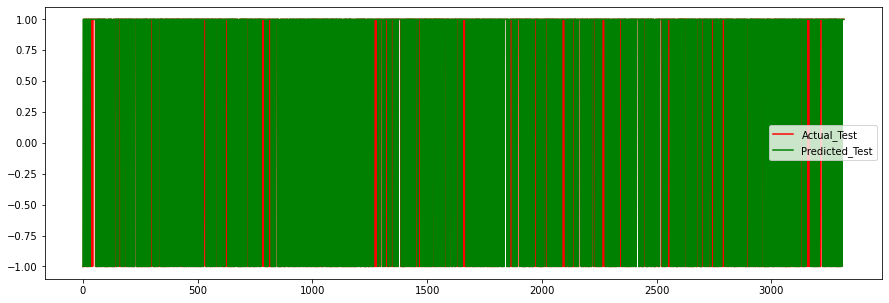

In [8]:
res = pd.DataFrame({'actual':y_test, 'predicted':pred}).reset_index(drop = True)

fig = plt.figure(figsize = (15,5))
plt.plot(res.index,res['actual'], color = 'red', label = 'Actual_Test')
plt.plot(res.index, res['predicted'],color = 'green', label = 'Predicted_Test')
plt.legend()
plt.show()